# 词向量训练

In [2]:
import torch
import logging
import jieba
import datetime
from BBA import Word2Vec as BBAWord2Vec

logging.basicConfig(level=logging.DEBUG)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 载入停用词
stopwords = []
try:
    with open("/workspace/project/nlp_2024/word2vec/stopwords/hit_stopwords.txt", "r") as file:
        while True:
            line = file.readline()
            if not line:
                break
            stopwords.append(line.strip())
    with open("/workspace/project/nlp_2024/word2vec/stopwords/SpecialCharacters&PunctuationMarks.txt", "r") as file:
        while True:
            line = file.readline()
            if not line:
                break
            stopwords.append(line.strip('\n'))
except FileNotFoundError:
    logging.warning("No stopwords file found.")

# 中文训练
total_lines = int(485228 / 100)  # 485228 simplified_chinese_wiki.txt
try:
    logging.debug(f'{datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")} - Started reading file.')
    sentences = []
    with open("/workspace/datasets/wiki/simplified_chinese_wiki.txt", "r") as file:
        line_count = 0
        while True:
            line = file.readline()
            if not line or line_count > total_lines:
                break
            sentences.append(list(jieba.cut(line.strip(), cut_all=False)))
            line_count += 1

            if line_count % 100 == 0:
                progress = (line_count / total_lines) * 100
                logging.info(f'Progress: {progress:.2f}% ({line_count}/{total_lines})')
    logging.debug(f'{datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")} - File reading completed.')
except FileNotFoundError:
    logging.warning("No train file found.")

# BBA CBOW
# bbaCBOW = BBAWord2Vec(sentences=sentences, stopwords=stopwords, epochs=5, algorithm=0, alpha=0.01).to(device)
# bbaCBOW.save('/workspace/project/nlp_2024/word2vec/pth/bbaCBOW_{}.pth'.format(total_lines))

# BBA SkipGram
bbaSG = BBAWord2Vec(sentences=sentences, stopwords=stopwords, epochs=2, algorithm=1, window=4, alpha=0.01, workers=4, negative=3, batch_words=2000).to(device)
bbaSG.save('/workspace/project/nlp_2024/word2vec/pth/bbaSG_{}.pth'.format(total_lines))

DEBUG:root:2024-10-09 14:34:46 - Started reading file.
INFO:root:Progress: 2.06% (100/4852)
INFO:root:Progress: 4.12% (200/4852)
INFO:root:Progress: 6.18% (300/4852)
INFO:root:Progress: 8.24% (400/4852)
INFO:root:Progress: 10.31% (500/4852)
INFO:root:Progress: 12.37% (600/4852)
INFO:root:Progress: 14.43% (700/4852)
INFO:root:Progress: 16.49% (800/4852)
INFO:root:Progress: 18.55% (900/4852)
INFO:root:Progress: 20.61% (1000/4852)
INFO:root:Progress: 22.67% (1100/4852)
INFO:root:Progress: 24.73% (1200/4852)
INFO:root:Progress: 26.79% (1300/4852)
INFO:root:Progress: 28.85% (1400/4852)
INFO:root:Progress: 30.92% (1500/4852)
INFO:root:Progress: 32.98% (1600/4852)
INFO:root:Progress: 35.04% (1700/4852)
INFO:root:Progress: 37.10% (1800/4852)
INFO:root:Progress: 39.16% (1900/4852)
INFO:root:Progress: 41.22% (2000/4852)
INFO:root:Progress: 43.28% (2100/4852)
INFO:root:Progress: 45.34% (2200/4852)
INFO:root:Progress: 47.40% (2300/4852)
INFO:root:Progress: 49.46% (2400/4852)
INFO:root:Progress: 51

# 词向量测试

[CBOW MostSimilar] context: ('不丹的首都及最大城市为廷布', '最大') -> Top 3 target: [('索马里', 0.5265), ('塔什干', 0.5167), ('耶路撒冷', 0.5096)]
[CBOW MostSimilar] context: ('无神论者不相信神存在，因为其缺乏经验证据的支持', '存在') -> Top 3 target: [('不一', 0.8246), ('抽', 0.8149), ('悲壮', 0.8147)]
[CBOW MostSimilar] context: ('亨利四世宣布成为英格兰国王', '成为') -> Top 3 target: [('阿方索', 0.6366), ('佛瑞', 0.6322), ('拉奥斯', 0.631)]
[CBOW MostSimilar] context: ('物种起源解释了适应自然选择适者生存的原理', '适应') -> Top 3 target: [('分子量', 0.8047), ('实验设计', 0.8014), ('尼龙', 0.792)]
[CBOW MostSimilar] context: ('资本主义天生与自由、平等和团结的价值观不相容', '平等') -> Top 3 target: [('参政权', 0.7248), ('私利', 0.7188), ('熊彼特', 0.7044)]
[CBOW MostSimilar] context: ('国家石油公司的双峰塔曾经是世界最高建筑物', '塔') -> Top 3 target: [('流长', 0.892), ('综合利用', 0.8878), ('鲜花', 0.8874)]
[CBOW MostSimilar] context: ('南宁第一条铁路是湘桂铁', '铁路') -> Top 3 target: [('上盖', 0.5863), ('螺蛳', 0.5749), ('非金属矿', 0.5716)]
[CBOW MostSimilar] context: ('虎跑泉水泡出的新茶尤为世人称道', '尤为') -> Top 3 target: [('昭侯', 0.3559), ('王沈', 0.3338), ('御赏', 0.3221)]
[CBOW MostSim

/tmp/ipykernel_6579/85673147.py:95: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()
/tmp/ipykernel_6579/85673147.py:96: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


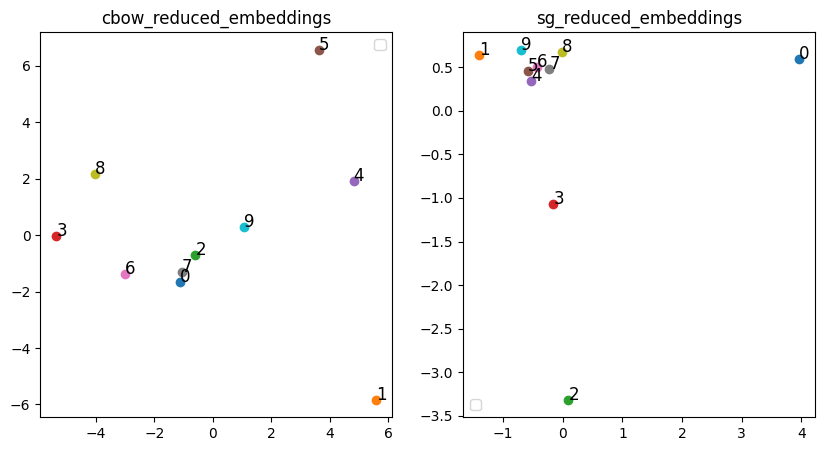

In [13]:
from BBA import Word2Vec as BBAWord2Vec
import matplotlib.pyplot as plt
import logging
import torch
import jieba

logging.basicConfig(level=logging.INFO)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 加载模型
bbaCBOW = BBAWord2Vec.load('/workspace/project/nlp_2024/word2vec/pth/bbaCBOW_4852.pth').to(device)
bbaSG = BBAWord2Vec.load('/workspace/project/nlp_2024/word2vec/pth/bbaSG_4852.pth').to(device)

# CBOW：上下文词预测中心词
contexts = ["不丹的首都及最大城市为廷布",
            "无神论者不相信神存在，因为其缺乏经验证据的支持",
            "亨利四世宣布成为英格兰国王",
            "物种起源解释了适应自然选择适者生存的原理",
            "资本主义天生与自由、平等和团结的价值观不相容",
            "国家石油公司的双峰塔曾经是世界最高建筑物",
            "南宁第一条铁路是湘桂铁",
            "虎跑泉水泡出的新茶尤为世人称道",
            "脑通常通过葡萄糖、血糖等的有氧代谢获得其大部分能量",
            "个人博客作者一般注重博客的内容"]
for context in contexts:
    context_list = list(context for context in jieba.cut(context, cut_all=False) if context in bbaCBOW.key_to_index)
    # word = context_list.pop(-1)
    word = context_list.pop(int(len(context_list) / 2))
    try:
        topn_words = bbaCBOW.most_similar(positive=context_list, topn=3, decimal=4)
        print(f'[CBOW MostSimilar] context: {context, word} -> Top {3} target: {topn_words}')
    except KeyError:
        logging.error(f'No words: {context_list} in vocab.')

# SkipGram：目标词预测其上下文词
targets = ["生理学", "服务", "骨", "苹果", "观众", "出生日期", "管教", "孙膑", "博物馆", "全盛时期"]
for target in targets:
    try:
        topn_words = bbaSG.most_similar(positive=target, topn=5, decimal=4)
        print(f'[SkipGram MostSimilar] target: {target} -> Top {5} context: {topn_words}')
    except KeyError:
        logging.error(f'No word: {target} in vocab.')

# 相似度预测
words = [
    # 包含
    ["操作系统", "内存",],
    ["戏剧", "音乐",],
    ["文学", "小说",],
    ["气候", "寒冷",],

    # 关联
    ["乒乓球", "运动员"],
    ["三角形", "勾股定理"],
    ["武器", "发射"],
    ["电影", "首映"],

    # 反义
    ["和平", "战争"],
    ["光明", "黑暗"],
    ["成功", "失败"],
    ["增加", "减少"],

    # 无关
    ["大桥", "包括"],
    ["欧盟", "方言"],
    ["分别", "公园"],
    ["地方", "陈独秀"],

]
for word1, word2 in words:
    try:
        cbowSimilarity = bbaCBOW.similarity(word1, word2)
        sgSimilarity = bbaSG.similarity(word1, word2)
        print(f'[Similarity] words: {word1, word2} -> cbow similarity: {cbowSimilarity:.4f}, sg similarity: {sgSimilarity:.4f}')
    except KeyError:
        logging.error(f'No words: {word1,word2} in vocab.')

# 词向量可视化
words = ["衡量", "团体", "疫情", "病毒", "专家", "城市", "困难", "压力", "差异", "尽管"]
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
try:
    cbow_reduced_embeddings = bbaCBOW.pca(words=words, n_components=2)
    sg_reduced_embeddings = bbaSG.pca(words=words, n_components=2)
    for i, word in enumerate(words):
        x1, y1 = cbow_reduced_embeddings[i]
        axs[0].scatter(x1, y1)
        axs[0].set_title('cbow_reduced_embeddings')
        axs[0].text(x1, y1, i, fontsize=12)

        x2, y2 = sg_reduced_embeddings[i]
        axs[1].scatter(x2, y2)
        axs[1].set_title('sg_reduced_embeddings')
        axs[1].text(x2, y2, i, fontsize=12)
    axs[0].legend()
    axs[1].legend()
except KeyError:
    logging.error(f'No words: {words} in vocab.')
plt.show()

# gensim测试

In [ ]:
import gensim

dictionary = gensim.corpora.Dictionary(sentences)
word2vec = gensim.models.Word2Vec(sentences=sentences, vector_size=100, epochs=10, sg=1, min_count=1)
word2vec.save()

target = '我们'
topk_words = word2vec.wv.most_similar(target, topn=5)
print(f'Target word: {target} -> Top {5} context words: {topn_words}')
similarity = word2vec.wv.similarity('我们', '希望')
print("The cosine similarity between 'word1' and 'word2' is: ", similarity)